In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
from scipy import stats

from projimmo.data import *
from projimmo.preprocessor import *
from projimmo.model import *
from projimmo.optimize_model import *

In [2]:
query = f"""
        SELECT *
        FROM `{GCP_PROJECT}`.{BQ_DATASET}.DVF_{DATA_YEAR}
    """
#chemin d'accès à nos fichiers locaux
data_query_cache_path=Path(f"raw_data/valeursfoncieres-2023.txt")

# import de nos data, ici à partir du fichier mais plus tard dans la base de data de bigquer
df= get_data_with_cache(query=query,
gcp_project=GCP_PROJECT,
        cache_path=data_query_cache_path,
        data_has_header=True
   )

#Pour écrire dans big query le df notre choix
#load_data_to_bq(
#        df_de_notre_choix,
 #       gcp_project=GCP_PROJECT,
 #       bq_dataset=BQ_DATASET,
 #       table=f'processed_{DATA_SIZE}',
 #       truncate=True
  #  )
#appel à la fonction clean_data
df_0=clean_data(df)
#appel à la fonction clean_outliers
df_1=clean_outliers(df_0)
#on passe notre df dans la pipeline
X_1=df_1.drop(columns="valeur_fonciere")
y_1=df_1.valeur_fonciere
df_2=preprocess_features(X_1)


Load data from local CSV...
✅ Data loaded, with shape (3727005, 43)
✅ X_processed, with shape (75664, 40)


In [3]:
X_1.head(20)

,type_de_voie,nombre_de_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,month_mutation,year_mutation,somme_surface_carrez,departement
654,RUE,1,2,95.0,4.0,0.0,1,2023,97.70,13
1027,RUE,2,2,95.0,4.0,0.0,1,2023,94.79,13
1598,RUE,1,2,45.0,2.0,0.0,1,2023,46.87,13
2101,AUTRE,1,2,58.0,3.0,0.0,1,2023,60.30,13
2112,RUE,1,2,65.0,3.0,0.0,2,2023,64.20,13
2268,RUE,1,2,93.0,3.0,0.0,1,2023,109.20,13
2564,RUE,1,2,61.0,2.0,0.0,1,2023,67.23,13
2781,RTE,1,2,100.0,5.0,0.0,1,2023,120.67,13
2998,RUE,1,2,80.0,4.0,0.0,1,2023,76.65,13
3374,RTE,1,2,48.0,3.0,0.0,1,2023,39.03,13


In [4]:
df_2.head(20)

,surface_reelle_bati,surface_terrain,somme_surface_carrez,code_type_local_1,code_type_local_2,type_de_voie_ALL,type_de_voie_AUTRE,type_de_voie_AV,type_de_voie_BD,type_de_voie_CHE,...,departement_31,departement_33,departement_34,departement_44,departement_59,departement_67,departement_69,departement_75,nombre_pieces_principales,nombre_de_lots
0,1.312723,0.0,1.215123,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
1,1.312723,0.0,1.135831,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0
2,-0.374117,0.0,-0.169891,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
3,0.064462,0.0,0.196049,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0
4,0.300619,0.0,0.302316,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0
5,1.245249,0.0,1.528474,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0
6,0.165672,0.0,0.384877,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
7,1.481407,0.0,1.841008,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0
8,0.806671,0.0,0.641553,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
9,-0.272906,0.0,-0.383515,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0


In [5]:
df_1.head(20)
df_1.valeur_fonciere.max(),df_1.valeur_fonciere.min()

(4503500.0, 1.0)

In [6]:
df_1.valeur_fonciere.mean()

325332.562380128

In [7]:
X_train,X_test,y_train,y_test=split_df(df_2,y_1)
model_type="XGB" #possible: "KNR","LR","XGB"
model_XGB=initialize_model(model_type)
    # Effectuer la validation croisée
cv_results_XGB = cross_validate_model(X_train, y_train, model_XGB)
fitted_model_XGB=train_model(X_train,y_train,model_XGB)
metrics_XGB=evaluate_model(X_test,y_test,fitted_model_XGB, model_type)

Validation croisée :
MSE moyen: 47356226135.82
Écart-type du MSE: 3725408901.93
Mean Squared Error (MSE): 43380552012.7611
Mean Absolute Error (MAE): 95432.81986066254
R-squared (R²) Score: 0.6751694543883908
Root Mean Squared Error (RMSE): 208279.98466670077
Mean Squared Logarithmic Error (MSLE): 0.241220909646347


In [8]:
X_train,X_test,y_train,y_test=split_df(df_2,y_1)
model_type="KNR" #possible: "KNR","LR","XGB"
model_KNR=initialize_model(model_type)
    # Effectuer la validation croisée
cv_results_KNR = cross_validate_model(X_train, y_train, model_KNR)
fitted_model_KNR=train_model(X_train,y_train,model_KNR)
metrics_KNR=evaluate_model(X_test,y_test,fitted_model_KNR, model_type)

Validation croisée :
MSE moyen: 54198660924.80
Écart-type du MSE: 3387843365.96
Mean Squared Error (MSE): 48221773953.85281
Mean Absolute Error (MAE): 104732.11109284346
R-squared (R²) Score: 0.6389187223993391
Root Mean Squared Error (RMSE): 219594.56722299123
Mean Squared Logarithmic Error (MSLE): 0.25571007128850853


In [9]:
X_train,X_test,y_train,y_test=split_df(df_2,y_1)
model_type="LR" #possible: "KNR","LR","XGB"
model_LR=initialize_model(model_type)
    # Effectuer la validation croisée
cv_results_LR = cross_validate_model(X_train, y_train, model_LR)
fitted_model_LR=train_model(X_train,y_train,model_LR)
metrics_XGB_LR=evaluate_model(X_test,y_test,fitted_model_LR, model_type)

Validation croisée :
MSE moyen: 76425190898.09
Écart-type du MSE: 4440331115.48
Mean Squared Error (MSE): 71744456427.48149
Mean Absolute Error (MAE): 142555.96355844845
R-squared (R²) Score: 0.4627825178644187
Root Mean Squared Error (RMSE): 267851.55670162063
Mean Squared Logarithmic Error (MSLE): None


# XGB meilleur modèle

In [10]:

# Importance des caractéristiques
importances = model_XGB.feature_importances_

# Création d'un DataFrame pour visualiser les importances
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importances_df)

                      Feature  Importance
37             departement_75    0.560009
2        somme_surface_carrez    0.178121
14           type_de_voie_RTE    0.042831
0         surface_reelle_bati    0.029593
36             departement_69    0.023041
30             departement_31    0.021613
7             type_de_voie_AV    0.015311
27          month_mutation_12    0.015290
22           month_mutation_7    0.008714
19           month_mutation_4    0.008518
39             nombre_de_lots    0.008028
18           month_mutation_3    0.008001
21           month_mutation_6    0.006811
34             departement_59    0.006516
38  nombre_pieces_principales    0.005740
5            type_de_voie_ALL    0.005528
32             departement_34    0.005340
10           type_de_voie_CRS    0.005298
24           month_mutation_9    0.004851
8             type_de_voie_BD    0.004761
6          type_de_voie_AUTRE    0.004572
15           type_de_voie_RUE    0.003697
20           month_mutation_5    0

## Interprétation

Caractéristiques Principales : Les caractéristiques avec les plus hauts scores d'importance, comme departement_75 avec 0.511535 et somme_surface_carrez avec 0.165999, sont celles qui ont le plus d'impact sur les prédictions du modèle. Cela suggère que ces variables sont cruciales pour le modèle.

Caractéristiques Peu Importantes : Les variables avec des importances proches de zéro, comme type_de_voie_CHS ou type_de_voie_N, ont un impact négligeable sur les prédictions. Ces caractéristiques pourraient être considérées pour une éventuelle suppression si elles n'apportent pas de valeur ajoutée.

In [11]:
#2. Permutation Importance
#La permutation importance évalue l'importance d'une caractéristique en mesurant
# la dégradation de la performance du modèle lorsque les valeurs de cette caractéristique sont permutées.


import matplotlib.pyplot as plt

from sklearn.inspection import permutation_importance

# Ajustez le modèle


# Calcul de l'importance des caractéristiques par permutation
results = permutation_importance(fitted_model_XGB, X_test, y_test, scoring='neg_mean_squared_error')

# Création d'un DataFrame pour visualiser les importances
perm_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': results.importances_mean
}).sort_values(by='Importance', ascending=False)

perm_importance_df


,Feature,Importance
37,departement_75,8.877815e+10
2,somme_surface_carrez,8.243108e+10
0,surface_reelle_bati,1.028347e+10
14,type_de_voie_RTE,4.551658e+09
27,month_mutation_12,4.193856e+09
38,nombre_pieces_principales,3.459651e+09
39,nombre_de_lots,2.864651e+09
30,departement_31,2.475867e+09
34,departement_59,1.155120e+09
18,month_mutation_3,1.057219e+09


# Suppression des colonnes qui n'ont pas d'importance

In [12]:
# Exemple de seuil pour les importances
threshold = 0.005
important_features = importances_df[importances_df['Importance'] > threshold]

# Affichage des caractéristiques importantes
print(important_features)

                      Feature  Importance
37             departement_75    0.560009
2        somme_surface_carrez    0.178121
14           type_de_voie_RTE    0.042831
0         surface_reelle_bati    0.029593
36             departement_69    0.023041
30             departement_31    0.021613
7             type_de_voie_AV    0.015311
27          month_mutation_12    0.015290
22           month_mutation_7    0.008714
19           month_mutation_4    0.008518
39             nombre_de_lots    0.008028
18           month_mutation_3    0.008001
21           month_mutation_6    0.006811
34             departement_59    0.006516
38  nombre_pieces_principales    0.005740
5            type_de_voie_ALL    0.005528
32             departement_34    0.005340
10           type_de_voie_CRS    0.005298


# Essai du modèle sans Paris

In [13]:
df_sans_Paris=df_2.drop(columns="departement_75").copy()

In [14]:
X_train,X_test,y_train,y_test=split_df(df_sans_Paris,y_1)
model_type="XGB" #possible: "KNR","LR","XGB"
model_sans_paris_XGB=initialize_model(model_type)
    # Effectuer la validation croisée
cv_results_sans_paris_XGB = cross_validate_model(X_train, y_train, model_sans_paris_XGB)
fitted_model_sans_paris_XGB=train_model(X_train,y_train,model_sans_paris_XGB)
metrics_sans_paris_XGB=evaluate_model(X_test,y_test,fitted_model_sans_paris_XGB, model_type)

Validation croisée :
MSE moyen: 51547553688.30
Écart-type du MSE: 3666865833.80
Mean Squared Error (MSE): 46106403024.612946
Mean Absolute Error (MAE): 103152.93665892111
R-squared (R²) Score: 0.6547584722695987
Root Mean Squared Error (RMSE): 214724.01594747836
Mean Squared Logarithmic Error (MSLE): 0.26746593157400983


In [15]:
# Formater les colonnes numériques avec des décimales définies
amel = pd.DataFrame(metrics_sans_paris_XGB, index=[0]) - pd.DataFrame(metrics_XGB, index=[0])
amel_percent =amel / pd.DataFrame(metrics_XGB, index=[0]) * 100

# Ajouter la ligne de pourcentage d'amélioration
amel.loc['Percentage Improvement'] = amel_percent.loc[0]

amel

,mse,mae,r2,rmse,msle
0,2.725851e+09,7720.116798,-0.020411,6444.031281,0.026245
Percentage Improvement,6.283578e+00,8.089583,-3.023090,3.093927,10.880078


# PCA

Le PCA (Principal Component Analysis) est une technique de réduction de dimensionnalité utilisée pour simplifier les données tout en conservant le maximum de leur variance. Voici comment cela fonctionne en quelques étapes clés :

1. Centrez les données
Objectif : Assurer que chaque caractéristique a une moyenne nulle.
Comment : Soustraire la moyenne de chaque caractéristique de ses valeurs.
2. Calcul des Matrices de Covariance
Objectif : Mesurer la manière dont les caractéristiques varient ensemble.
Comment : Calculer la matrice de covariance pour les données centrées.
3. Calcul des Valeurs Propres et Vecteurs Propres
Objectif : Trouver les directions dans lesquelles les données varient le plus.
Comment : Résoudre le problème des valeurs propres de la matrice de covariance pour obtenir les vecteurs propres (directions principales) et les valeurs propres (quantité de variance dans chaque direction).
4. Choisir les Composants Principaux
Objectif : Sélectionner les vecteurs propres associés aux plus grandes valeurs propres pour réduire la dimensionnalité tout en conservant le plus d'information possible.
Comment : Sélectionner les k premiers vecteurs propres qui expliquent la majorité de la variance.
5. Projections des Données
Objectif : Transformer les données dans le nouvel espace de caractéristiques.
Comment : Multiplier les données centrées par les vecteurs propres sélectionnés pour obtenir les nouvelles caractéristiques (composants principaux).


In [16]:
X_train.shape

(60531, 39)

In [17]:

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# Définir le nombre de composantes principales que vous souhaitez conserver (ex: 0.95 pour 95% de la variance)
n_components = int(X_train.shape[1]/2) # Vous pouvez aussi définir un nombre fixe de composantes comme n_components=20
pca = PCA(n_components=n_components)

# Appliquer le PCA sur X_train et X_test
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Vérifier la variance expliquée par les composantes principales
print(f"Variance expliquée par les {pca.n_components_} composantes principales : {sum(pca.explained_variance_ratio_):.2f}")

# Initialiser le modèle (ici XGB)
model_type = "XGB"
model_XGB = initialize_model(model_type)

# Validation croisée sur les données transformées par PCA
cv_results_XGB_pca = cross_validate_model(X_train_pca, y_train, model_XGB)

# Entraîner le modèle sur les données réduites
fitted_model_XGB_pca = train_model(X_train_pca, y_train, model_XGB)

# Évaluer le modèle sur les données de test transformées
metrics_XGB_pca = evaluate_model(X_test_pca, y_test, fitted_model_XGB_pca, model_type)

# Afficher les résultats
print("Résultats après PCA:")

metrics_XGB_pca


Variance expliquée par les 19 composantes principales : 1.00
Validation croisée :
MSE moyen: 57401627137.64
Écart-type du MSE: 4091788306.96
Mean Squared Error (MSE): 53435109771.83825
Mean Absolute Error (MAE): 111556.93054471415
R-squared (R²) Score: 0.5998816276727761
Root Mean Squared Error (RMSE): 231160.35510406678
Mean Squared Logarithmic Error (MSLE): None
Résultats après PCA:


{'mse': 53435109771.83825,
 'mae': 111556.93054471415,
 'r2': 0.5998816276727761,
 'rmse': 231160.35510406678,
 'msle': None}

In [18]:
# Créer un DataFrame vide pour stocker les résultats
#amel = pd.DataFrame(columns=['MSE', 'MAE', 'R2', 'RMSE', 'MSLE'])



# Convertir les métriques en DataFrames
df_XGB = pd.DataFrame(metrics_XGB, index=[0])
df_sans_paris_XGB = pd.DataFrame(metrics_sans_paris_XGB, index=[0])
df_XGB_pca = pd.DataFrame(metrics_XGB_pca, index=[0])
print(df_XGB)
# Ajouter les résultats au DataFrame
#amel = pd.concat([
#    amel,
#    pd.DataFrame(df_XGB, index=['Model XGB']),
 #   pd.DataFrame(df_sans_paris_XGB, index=['Sans Paris']),
 #   pd.DataFrame(df_XGB_pca, index=['Avec PCA'])
#])
# Créer un DataFrame pour stocker les résultats
amel = pd.DataFrame()

# Ajouter les résultats des modèles
amel = pd.concat([
    amel,
    df_XGB.rename(index={0: 'Model XGB'}),
    df_sans_paris_XGB.rename(index={0: 'Sans Paris'}),
    df_XGB_pca.rename(index={0: 'Sans Paris avec PCA'})
])
## Calcul des différences entre les modèles
diff_avec_sans_paris = df_XGB-df_sans_paris_XGB
diff_sans_paris_pca = df_XGB_pca-df_XGB

# Ajouter les résultats des différences au DataFrame
amel = pd.concat([
    amel,
    diff_avec_sans_paris.rename(index={0: 'Diff avec et sans Paris'}),
    diff_sans_paris_pca.rename(index={0: 'Diff sans Paris avec PCA'})
])

# Calcul du pourcentage d'amélioration
amel_percent_avec_sans_paris = (diff_avec_sans_paris / df_XGB) * 100
amel_percent_sans_paris_pca = (diff_sans_paris_pca / df_XGB) * 100

# Ajouter les pourcentages d'amélioration au DataFrame
amel = pd.concat([
    amel,
    amel_percent_avec_sans_paris.rename(index={0: 'Percentage Improvement avec et sans Paris'}),
    amel_percent_sans_paris_pca.rename(index={0: 'Percentage Improvement sans Paris avec PCA'})
])

# Formater les pourcentages
for index in ['Percentage Improvement avec et sans Paris', 'Percentage Improvement sans Paris avec PCA']:
    if index in amel.index:
        amel.loc[index] = amel.loc[index].apply(lambda x: f"{x:.2f}%" if pd.notna(x) else x)

amel

            mse           mae        r2           rmse      msle
0  4.338055e+10  95432.819861  0.675169  208279.984667  0.241221


,mse,mae,r2,rmse,msle
Model XGB,43380552012.761101,95432.819861,0.675169,208279.984667,0.241221
Sans Paris,46106403024.612946,103152.936659,0.654758,214724.015947,0.267466
Sans Paris avec PCA,53435109771.838249,111556.930545,0.599882,231160.355104,NaN
Diff avec et sans Paris,-2725851011.851845,-7720.116798,0.020411,-6444.031281,-0.026245
Diff sans Paris avec PCA,10054557759.077148,16124.110684,-0.075288,22880.370437,NaN
Percentage Improvement avec et sans Paris,-6.28%,-8.09%,3.02%,-3.09%,-10.88%
Percentage Improvement sans Paris avec PCA,23.18%,16.90%,-11.15%,10.99%,NaN


# Essai du XGBOOST sans les départements

In [19]:

# Créer une liste des colonnes qui ne commencent pas par 'departement'
colonnes_sans_departement = [col for col in df_2.columns if not col.startswith('departement')]

# Créer un nouveau DataFrame avec ces colonnes
df_sans_departement = df_2[colonnes_sans_departement]

# Afficher le nouveau DataFrame
df_sans_departement

,surface_reelle_bati,surface_terrain,somme_surface_carrez,code_type_local_1,code_type_local_2,type_de_voie_ALL,type_de_voie_AUTRE,type_de_voie_AV,type_de_voie_BD,type_de_voie_CHE,...,month_mutation_6,month_mutation_7,month_mutation_8,month_mutation_9,month_mutation_10,month_mutation_11,month_mutation_12,year_mutation_2023,nombre_pieces_principales,nombre_de_lots
0,1.312723,0.0,1.215123,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0
1,1.312723,0.0,1.135831,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0
2,-0.374117,0.0,-0.169891,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
3,0.064462,0.0,0.196049,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0
4,0.300619,0.0,0.302316,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75659,-0.610274,0.0,-0.449728,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,1.0
75660,-0.745221,0.0,-0.444823,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0
75661,-0.542800,0.0,-0.357084,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
75662,0.199409,0.0,0.147548,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0


In [20]:
X_train,X_test,y_train,y_test=split_df(df_sans_departement,y_1)
model_type="XGB" #possible: "KNR","LR","XGB"
model_sans_paris_XGB=initialize_model(model_type)
    # Effectuer la validation croisée
cv_results_sans_paris_XGB = cross_validate_model(X_train, y_train, model_sans_paris_XGB)
fitted_model_sans_paris_XGB=train_model(X_train,y_train,model_sans_paris_XGB)
metrics_sans_paris_XGB=evaluate_model(X_test,y_test,fitted_model_sans_paris_XGB, model_type)

Validation croisée :
MSE moyen: 88870141425.76
Écart-type du MSE: 4186021657.95
Mean Squared Error (MSE): 81959017325.13457
Mean Absolute Error (MAE): 163619.12793497654
R-squared (R²) Score: 0.3862965988149881
Root Mean Squared Error (RMSE): 286284.8534678958
Mean Squared Logarithmic Error (MSLE): 0.45468713985432047


# PCA avec Paris

In [21]:
X_train,X_test,y_train,y_test=split_df(df_2,y_1)

# Définir le nombre de composantes principales que vous souhaitez conserver (ex: 0.95 pour 95% de la variance)
n_components = int(X_train.shape[1]/2) # Vous pouvez aussi définir un nombre fixe de composantes comme n_components=20
pca = PCA(n_components=n_components)

# Appliquer le PCA sur X_train et X_test
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Vérifier la variance expliquée par les composantes principales
print(f"Variance expliquée par les {pca.n_components_} composantes principales : {sum(pca.explained_variance_ratio_):.2f}")


# Validation croisée sur les données transformées par PCA
cv_results_XGB_pca_paris = cross_validate_model(X_train_pca, y_train, model_XGB)

# Entraîner le modèle sur les données réduites
fitted_model_XGB_pca_paris = train_model(X_train_pca, y_train, model_XGB)

# Évaluer le modèle sur les données de test transformées
metrics_XGB_pca_paris = evaluate_model(X_test_pca, y_test, fitted_model_XGB_pca_paris, model_type)

# Afficher les résultats
print("Résultats après PCA:")

metrics_XGB_pca_paris

Variance expliquée par les 20 composantes principales : 1.00
Validation croisée :
MSE moyen: 47680087701.04
Écart-type du MSE: 3862753145.83
Mean Squared Error (MSE): 42986344560.77029
Mean Absolute Error (MAE): 97905.13931406115
R-squared (R²) Score: 0.67812125227415
Root Mean Squared Error (RMSE): 207331.48473102268
Mean Squared Logarithmic Error (MSLE): 0.2477941134066829
Résultats après PCA:


{'mse': 42986344560.77029,
 'mae': 97905.13931406115,
 'r2': 0.67812125227415,
 'rmse': 207331.48473102268,
 'msle': 0.2477941134066829}

In [22]:

# Convertir les métriques en DataFrames
df_XGB = pd.DataFrame(metrics_XGB, index=[0])
df_XGB_pca_paris = pd.DataFrame(metrics_XGB_pca_paris, index=[0])

# Créer un DataFrame pour stocker les résultats
amel = pd.DataFrame()

# Ajouter les résultats des modèles
amel = pd.concat([
    df_XGB.rename(index={0: 'Model XGB'}),
    df_XGB_pca_paris.rename(index={0: 'Avec Paris avec PCA'})
])

# Calcul des différences entre les modèles

diff_avec_paris_pca = df_XGB-df_XGB_pca_paris

# Ajouter les résultats des différences au DataFrame
amel = pd.concat([
    amel,
    diff_avec_paris_pca.rename(index={0: 'Diff avec Paris avec PCA'})
])

# Calcul du pourcentage d'amélioration
amel_percent_avec_paris_pca = (diff_avec_paris_pca / df_XGB) * 100

# Ajouter les pourcentages d'amélioration au DataFrame
amel = pd.concat([
    amel,
    amel_percent_avec_paris_pca.rename(index={0: 'Percentage Improvement avec Paris avec PCA'})
])

# Formater les pourcentages
for index in ['Percentage Improvement avec Paris avec PCA']:
    if index in amel.index:
        amel.loc[index] = amel.loc[index].apply(lambda x: f"{x:.2f}%" if pd.notna(x) else x)

amel

,mse,mae,r2,rmse,msle
Model XGB,43380552012.761101,95432.819861,0.675169,208279.984667,0.241221
Avec Paris avec PCA,42986344560.770287,97905.139314,0.678121,207331.484731,0.247794
Diff avec Paris avec PCA,394207451.990814,-2472.319453,-0.002952,948.499936,-0.006573
Percentage Improvement avec Paris avec PCA,0.91%,-2.59%,-0.44%,0.46%,-2.72%


In [23]:
X_train,X_test,y_train,y_test=split_df(df_2,y_1)

# Définir le nombre de composantes principales que vous souhaitez conserver (ex: 0.95 pour 95% de la variance)
n_components = int(X_train.shape[1]/2) # Vous pouvez aussi définir un nombre fixe de composantes comme n_components=20
pca = PCA(n_components=n_components)

# Appliquer le PCA sur X_train et X_test
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Vérifier la variance expliquée par les composantes principales
print(f"Variance expliquée par les {pca.n_components_} composantes principales : {sum(pca.explained_variance_ratio_):.2f}")


# Validation croisée sur les données transformées par PCA
cv_results_XGB_pca_paris = cross_validate_model(X_train_pca, y_train, model_XGB)

# Entraîner le modèle sur les données réduites
fitted_model_XGB_pca_paris = train_model(X_train_pca, y_train, model_XGB)

# Évaluer le modèle sur les données de test transformées
metrics_XGB_pca_paris = evaluate_model(X_test_pca, y_test, fitted_model_XGB_pca_paris, model_type)

# Afficher les résultats
print("Résultats après PCA:")

metrics_XGB_pca_paris

Variance expliquée par les 20 composantes principales : 1.00
Validation croisée :
MSE moyen: 47597265613.93
Écart-type du MSE: 3744075967.84
Mean Squared Error (MSE): 45065689456.30296
Mean Absolute Error (MAE): 98409.28854758639
R-squared (R²) Score: 0.6625512628297578
Root Mean Squared Error (RMSE): 212286.80942607566
Mean Squared Logarithmic Error (MSLE): 0.24785703199035905
Résultats après PCA:


{'mse': 45065689456.30296,
 'mae': 98409.28854758639,
 'r2': 0.6625512628297578,
 'rmse': 212286.80942607566,
 'msle': 0.24785703199035905}

## Choix de n_components par validation croisée

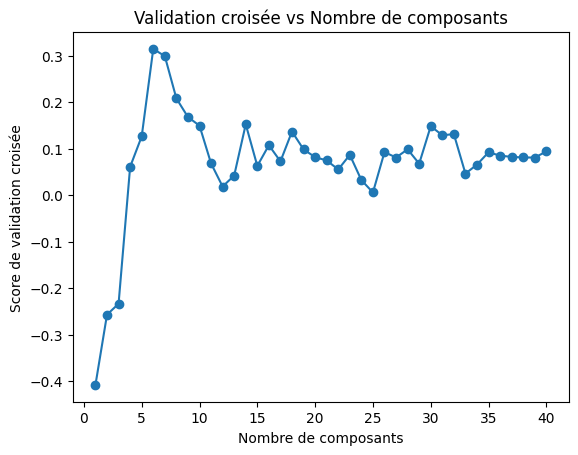

In [24]:

# Test de différents nombres de composants
n_components_range = range(1,df_2.shape[1] + 1)
scores = []

for n in n_components_range:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(df_2)

    score = cross_val_score(model_XGB, X_pca, y_1, cv=5).mean()
    scores.append(score)

# Tracer les scores
plt.plot(n_components_range, scores, marker='o')
plt.xlabel('Nombre de composants')
plt.ylabel('Score de validation croisée')
plt.title('Validation croisée vs Nombre de composants')
plt.show()

Graphe se stabilise à 35 

In [25]:
scores
# Trouver l'indice du meilleur score
best_index = np.argmax(scores)

# Correspondre l'indice avec le nombre de composants
best_n_components = n_components_range[best_index]

print(f"Le meilleur nombre de composants est : {best_n_components}")

Le meilleur nombre de composants est : 6


## Verification par graph de la variance expliquée cumulée

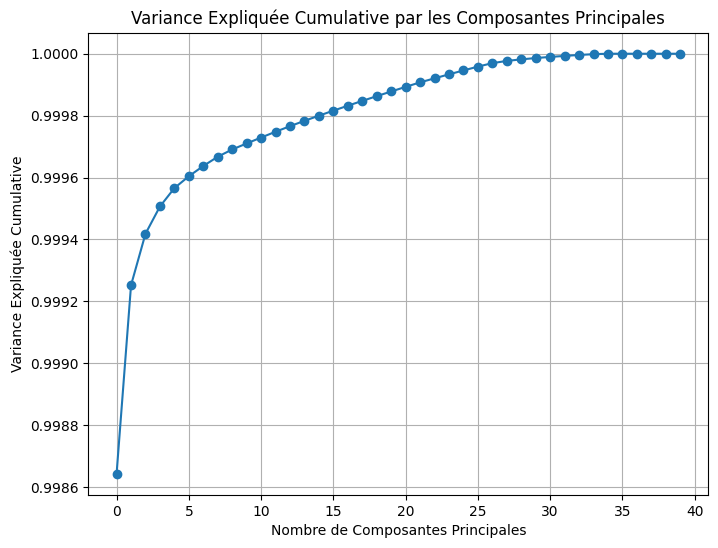

In [26]:
# Appliquer PCA
pca = PCA()
X_pca = pca.fit_transform(df_2)

# Calculer la variance expliquée cumulée
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

# Tracer la variance expliquée cumulée
plt.figure(figsize=(8, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.title('Variance Expliquée Cumulative par les Composantes Principales')
plt.xlabel('Nombre de Composantes Principales')
plt.ylabel('Variance Expliquée Cumulative')
plt.grid(True)
plt.show()

# Essai avec 6 puis 35

In [27]:

# Définir le nombre de composantes principales que vous souhaitez conserver (ex: 0.95 pour 95% de la variance)
n_components = 6 # Vous pouvez aussi définir un nombre fixe de composantes comme n_components=20

X_train,X_test,y_train,y_test=split_df(df_2,y_1)

# Définir le nombre de composantes principales que vous souhaitez conserver (ex: 0.95 pour 95% de la variance)
pca = PCA(n_components=n_components)

# Appliquer le PCA sur X_train et X_test
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Vérifier la variance expliquée par les composantes principales
print(f"Variance expliquée par les {pca.n_components_} composantes principales : {sum(pca.explained_variance_ratio_):.2f}")


# Validation croisée sur les données transformées par PCA
cv_results_XGB_pca_6 = cross_validate_model(X_train_pca, y_train, model_XGB)

# Entraîner le modèle sur les données réduites
fitted_model_XGB_pca_6 = train_model(X_train_pca, y_train, model_XGB)

# Évaluer le modèle sur les données de test transformées
metrics_XGB_pca_6 = evaluate_model(X_test_pca, y_test, fitted_model_XGB_pca_6, model_type)

# Afficher les résultats
print("Résultats après PCA:")

metrics_XGB_pca_6

Variance expliquée par les 6 composantes principales : 1.00
Validation croisée :
MSE moyen: 53530357868.08
Écart-type du MSE: 4427642603.80
Mean Squared Error (MSE): 49301870109.3803
Mean Absolute Error (MAE): 98546.91196611917
R-squared (R²) Score: 0.6308310377749068
Root Mean Squared Error (RMSE): 222040.24434633533
Mean Squared Logarithmic Error (MSLE): 0.25254067193459195
Résultats après PCA:


{'mse': 49301870109.3803,
 'mae': 98546.91196611917,
 'r2': 0.6308310377749068,
 'rmse': 222040.24434633533,
 'msle': 0.25254067193459195}

In [28]:
# Définir le nombre de composantes principales que vous souhaitez conserver (ex: 0.95 pour 95% de la variance)
n_components = 35 # Vous pouvez aussi définir un nombre fixe de composantes comme n_components=20

X_train,X_test,y_train,y_test=split_df(df_2,y_1)

# Définir le nombre de composantes principales que vous souhaitez conserver (ex: 0.95 pour 95% de la variance)
pca = PCA(n_components=n_components)

# Appliquer le PCA sur X_train et X_test
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Vérifier la variance expliquée par les composantes principales
print(f"Variance expliquée par les {pca.n_components_} composantes principales : {sum(pca.explained_variance_ratio_):.2f}")


# Validation croisée sur les données transformées par PCA
cv_results_XGB_pca_6 = cross_validate_model(X_train_pca, y_train, model_XGB)

# Entraîner le modèle sur les données réduites
fitted_model_XGB_pca_6 = train_model(X_train_pca, y_train, model_XGB)

# Évaluer le modèle sur les données de test transformées
metrics_XGB_pca_6 = evaluate_model(X_test_pca, y_test, fitted_model_XGB_pca_6, model_type)

# Afficher les résultats
print("Résultats après PCA:")

metrics_XGB_pca_6


Variance expliquée par les 35 composantes principales : 1.00
Validation croisée :
MSE moyen: 47597615717.10
Écart-type du MSE: 4029453143.48
Mean Squared Error (MSE): 42371008385.25795
Mean Absolute Error (MAE): 97024.82467986972
R-squared (R²) Score: 0.6827288466073764
Root Mean Squared Error (RMSE): 205842.1929179194
Mean Squared Logarithmic Error (MSLE): None
Résultats après PCA:


{'mse': 42371008385.25795,
 'mae': 97024.82467986972,
 'r2': 0.6827288466073764,
 'rmse': 205842.1929179194,
 'msle': None}

# Conclusion: mieux avec 35

In [29]:
best_params=grid_search(X_train, y_train, model_type,model_XGB)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for XGB: {'eta': 0.2, 'max_depth': 6, 'n_estimators': 150}
Best score for XGB: 44842486308.79878


In [33]:
best_params['eta']

0.2

In [35]:
eta=best_params['eta']
max_depth=best_params['max_depth']
n_estimators=best_params['n_estimators']
model_type="XGB"
n_components=35
model_XGB_opti=initialize_model(model_type, max_depth=max_depth, eta=eta, n_estimators=n_estimators)

X_train,X_test,y_train,y_test=split_df(df_2,y_1)

# Définir le nombre de composantes principales que vous souhaitez conserver (ex: 0.95 pour 95% de la variance)
pca = PCA(n_components=n_components)

# Appliquer le PCA sur X_train et X_test
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Validation croisée sur les données transformées par PCA
cv_results_XGB_opti = cross_validate_model(X_train_pca, y_train, model_XGB_opti)

# Entraîner le modèle sur les données réduites
fitted_model_XGB_opti = train_model(X_train_pca, y_train, model_XGB_opti)

# Évaluer le modèle sur les données de test transformées
metrics_XGB_opti = evaluate_model(X_test_pca, y_test, fitted_model_XGB_opti, model_type)

# Afficher les résultats
print("Résultats après PCA:")

metrics_XGB_opti

Validation croisée :
MSE moyen: 43671199233.42
Écart-type du MSE: 3293681568.04
Mean Squared Error (MSE): 39526705640.33894
Mean Absolute Error (MAE): 94742.09629962187
R-squared (R²) Score: 0.7040267870357244
Root Mean Squared Error (RMSE): 198813.24312112347
Mean Squared Logarithmic Error (MSLE): None
Résultats après PCA:


{'mse': 39526705640.33894,
 'mae': 94742.09629962187,
 'r2': 0.7040267870357244,
 'rmse': 198813.24312112347,
 'msle': None}

#Metrics


MAE donne une idée plus intuitive de l'erreur moyenne par prédiction. Plus il est bas, mieux c'est.


Un MSE plus bas indique une meilleure performance.


 Un R² plus proche de 1 signifie que le modèle explique bien la variance des données.



 RMSE Plus ce chiffre est bas, mieux c'est.


 MSLE est utile lorsque vous vous souciez plus des erreurs relatives que des erreurs absolues, surtout si les valeurs cibles varient beaucoup.


Les résultats que vous avez obtenus pour les différents modèles fournissent une bonne vue d'ensemble de leur performance sur vos données. Voici une analyse comparative de chaque modèle que vous avez testé :

1. Régression Linéaire (LR)
Mean Squared Error (MSE): 87,474,326,377.41
Mean Absolute Error (MAE): 166,599.43
R-squared (R²) Score: 0.345
Root Mean Squared Error (RMSE): 295,760.59
Mean Squared Logarithmic Error (MSLE): Non calculé
Analyse :

La régression linéaire a donné les résultats les moins favorables parmi les trois modèles. Le MSE élevé et le RMSE indiquent des erreurs importantes dans les prédictions.
L'R² de 0.345 signifie que le modèle explique environ 34.5% de la variance des données, ce qui est relativement faible. Cela suggère que la régression linéaire ne capture pas bien la complexité des relations dans vos données.
Le MSLE n'a pas pu être calculé, probablement en raison de valeurs négatives ou nulles dans les prédictions ou les vraies valeurs.
2. K-Nearest Neighbors (KNR)
Mean Squared Error (MSE): 47,820,354,384.10
Mean Absolute Error (MAE): 103,767.93
R-squared (R²) Score: 0.642
Root Mean Squared Error (RMSE): 218,678.66
Mean Squared Logarithmic Error (MSLE): 0.254
Analyse :

KNR a donné des résultats plus compétitifs que la régression linéaire, avec un MSE et RMSE plus faibles, ainsi qu'un MAE plus bas.
L'R² de 0.642 indique que le modèle explique environ 64.2% de la variance, ce qui est une amélioration par rapport à la régression linéaire.
Le MSLE est également calculé pour KNR et est plus élevé que pour XGBoost, ce qui pourrait suggérer que KNR est légèrement moins performant dans les prédictions pour les valeurs élevées.
3. XGBoost (XGB)
Mean Squared Error (MSE): 44,815,671,502.56
Mean Absolute Error (MAE): 95,277.02
R-squared (R²) Score: 0.664
Root Mean Squared Error (RMSE): 211,697.12
Mean Squared Logarithmic Error (MSLE): 0.241
Analyse :

XGBoost a montré les meilleurs résultats parmi les modèles testés. Le MSE et le RMSE sont les plus bas, ce qui indique des prédictions plus précises.
L'R² de 0.664 montre que XGBoost explique environ 66.4% de la variance des données, ce qui est la meilleure performance parmi les modèles testés.
Le MSLE est également le plus bas pour XGBoost, ce qui est un bon signe de performance en termes de précision relative pour les valeurs positives.
Résumé des Résultats
XGBoost (XGB) est le meilleur modèle parmi ceux testés, offrant les plus faibles erreurs (MSE, MAE, RMSE) et le meilleur score R².
K-Nearest Neighbors (KNR) est également performant mais légèrement derrière XGBoost.
Régression Linéaire (LR) semble être le moins performant en raison de son incapacité à bien capturer les relations complexes dans les données.
Recommandations
Optimisation des Hyperparamètres:

Pour XGBoost, explorez davantage les hyperparamètres pour voir si une meilleure configuration peut améliorer encore les performances.
Validation Croisée:

Utilisez la validation croisée pour obtenir une évaluation plus robuste des performances du modèle et éviter le surapprentissage.
Analyse des Résidus:

Examinez les résidus pour les différents modèles afin de comprendre où les prédictions échouent le plus et comment vous pouvez améliorer le modèle.
Feature Engineering:

Continuez à explorer de nouvelles fonctionnalités ou transformations qui pourraient améliorer la performance des modèles.
Testing avec d'Autres Données:

Testez les modèles avec des données supplémentaires pour vérifier leur robustesse et leur généralisation.